Hello, Valentina!
My name is Olga. I'm happy to reviewing your project today.

You can find my comments in green, yellow or red boxes like this:


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Success. Everything is done succesfully.
</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Remarks. Some recommendations.
</div>


<div class="alert alert-block alert-danger">
    
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
    
Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

<b>Please don't remove my comments :)</b>

You can answer me by using this: 

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Overallv reviewer's comment</b> <a class="tocSkip"></a>
    
Hello Valentina! your project is a true "A". Congratulations!
    
Your project has been accepted and you can go to the next sprint!
    
 Keep at it. You're improving every day! :)
</div>

# Project Description
As an analyst for an online store Ice dealing in video games over the world. Management wants to identify patterns in user, expert, genre,platform etc to determine if a game would succeed or not in planning for potential advertising. 

# Business Goal
I am required as part of this project to make recommedations on potentail games that would be profitable by addressing the following issues:
1. Identify the number games released in a year.
2. How sales varied accross platforms and identify the platforms with the highest sales.
3. Identify and eliminate potential outliers.
4. Identify the most profitable game by genre.
5. Analyse sales by region  and determine the most profitable platorms by market share.
6. Draw a null and alternative hypothesis to compare the ratings of two platforms and game types. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great! We have description and goals of our project!
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import rcParams
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
try:
    games_df = pd.read_csv('/Users/eseyram/Downloads/games.csv')
except:
    games_df = pd.read_csv('/datasets/games.csv')
games_df.head()   

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
    
Thank you for try/except. It help us to download datasets from dindifferent places. It is great! 
    
</div>

In [3]:
games_df.columns=games_df.columns.str.lower()

In [4]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##  Conclusion
The video games dataset is made up of 16715 entries in all with 11 columns five of which are object types and six float types. Some columns like critic score, rating etc have some missing values which would be explored later. Reasons for missing values like user_score or critic_score might be as a result of missing info or results just not being available.

In [5]:
games_df.isnull().sum()/games_df.shape[0]

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

## Conclusion
The calculation of null values show significant missing ones for critic_score, user_score and rating with 51%, 40% and 40% respectively. Others like name, year_of_release and genre are below 1% of the column values. These missing values would be handled in the next stage of the analysis.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
We have basic information about our data and some problems with nulls. Let's go!

</div>
    

In [6]:
games_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


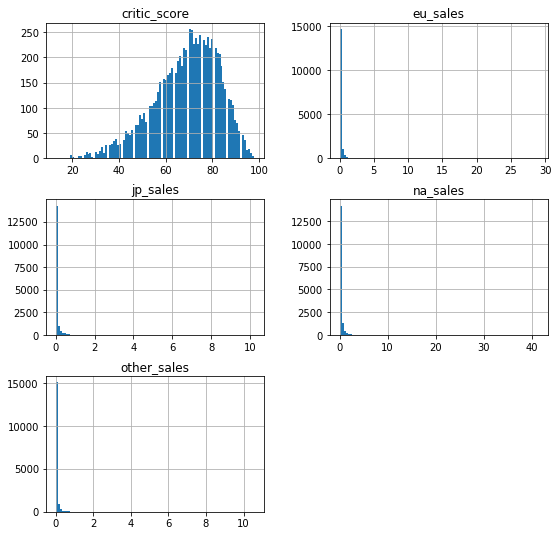

In [7]:
games_df[['na_sales','eu_sales','jp_sales','other_sales','critic_score']].hist(bins=100,figsize=(9,9));

In [8]:
games_df['total_sales']= games_df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [9]:
games_df['name']=games_df.drop(games_df[games_df['name'].isna()].index)

In [10]:
games_df['year_of_release']= games_df['year_of_release'].fillna(games_df['year_of_release'].min()).astype('int')

In [11]:
games_df[games_df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [12]:
games_df=games_df.drop(games_df[games_df['genre'].isnull()].index)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done! у have a new column with total sales and found 2 same missing values ans delete them.Great!

</div>

In [13]:
games_df['critic_score']=games_df['critic_score'].fillna(-1)

In [14]:
games_df[games_df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,1980,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E,0.01


In [15]:
games_df['user_score'] = games_df['user_score'].replace('tbd',0)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great idea! :) 

</div>

In [16]:
games_df['user_score']= games_df['user_score'].astype('float')

In [17]:
games_df['user_score'] = games_df['user_score'].fillna(-1)

In [18]:
games_df['user_score'].value_counts()

-1.0    6699
 0.0    2425
 7.8     324
 8.0     290
 8.2     282
        ... 
 2.3       2
 1.3       2
 1.9       2
 9.6       2
 9.7       1
Name: user_score, Length: 96, dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! :) 
</div>

In [19]:
games_df['genre']= games_df['genre'].str.lower()

In [20]:
games_df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [21]:
games_df.loc[(games_df.rating.isnull()),'rating']='NA'

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Excellent variant!

</div>

In [22]:
games_df.duplicated().sum()

0

## Conclusion

By the description of the data, it's evident that, the least year is 1980 with 2016 being the later year. NA_sales seem to have some extreme sales values relative to their mean and median values. With the exception of critic score which seems to symmetrical arround the mean, the rest of the columns are right skewed. 

The missing values for names were droped as its difficult to fill them in without appropriate reference guide.
That for year of release was filled in with the min year of the column with missing genre columns also being dropped.

TBD user_score ratings were filled with zero as there is actually no score for it or yet to be determined.

Critic_score and user_score missing values were filled with -1.

Missing rating values were filled with NA as again, there is actually no rating given.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done! Thank you for the conclusion after step. It makes our research more informable and detailed.
</div>

### Review of games released accross the years

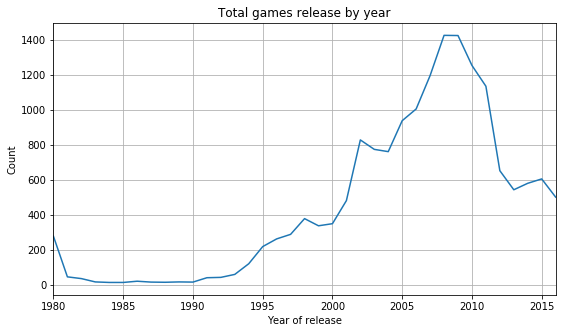

In [23]:
(games_df
 .pivot_table(index='year_of_release',values='name',aggfunc='count')
 .sort_values('year_of_release',ascending=False)
 .plot(figsize=(9,5),legend=False,title='Total games release by year',grid=True))
plt.ylabel('Count')
plt.xlabel('Year of release');

### Conclusion

The graph above of games released by year show significant increase from 1995 with a peak at 2009 before having a stip decline to 2016.Those from 1980 to 1995 were very minimal.
By this, its clear most of the relevant data worthy of use in the analysis would have to be after 1995.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Excellent type of graph! We can see years and numbers of games of each platform!


How do you think, why we have increse after 2000 and decrease after 2010?</div>

### Review of sales by platform for high performing one and those with zero sales


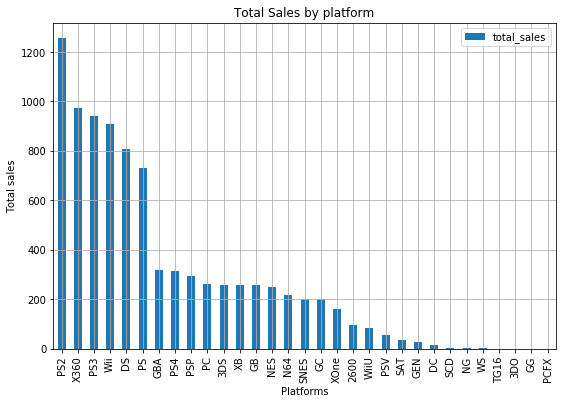

In [24]:
games_df_pivoted = (games_df
 .pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values('total_sales',ascending =False))
games_df_pivoted.plot(kind='bar',grid=True,figsize=(9,6))
plt.title('Total Sales by platform')
plt.xlabel('Platforms')
plt.ylabel('Total sales');

In [25]:
games_df_platform =pd.DataFrame(games_df_pivoted.head(10))
games_df_platform

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


### Conclusion

The top 10 most profitable patforms selected from the pivot table shows PS2, X360, PS3 etc among the leading platforms with 3DO, GG and PCFX being the least profitable.

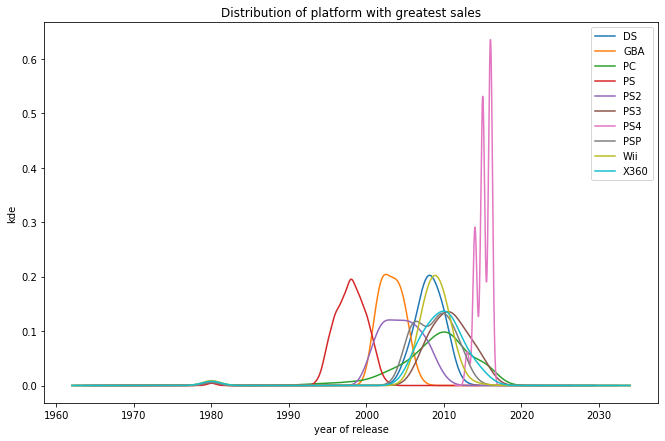

In [26]:
(games_df.query('platform in @games_df_platform.index')
 .groupby('platform')['year_of_release'].plot(kind='kde',legend=True,figsize=(11,7)))
plt.xlabel('year of release')
plt.ylabel('kde')
plt.title('Distribution of platform with greatest sales')

plt.show();

### Conclusion
A plot of the top 10 most performing platforms show their popularity started after 1995. PS which was first introduced in 1997 was the gainer until GBA was introduced in 2002. Wii and PC which were both introducd in 2006 also gained popularity until PS4 in 2013.

In [27]:
games_df_02 = games_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
games_df_02

,platform,year_of_release,total_sales
0,2600,1980,21.88
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
248,XB,2008,0.18
249,XOne,2013,18.96
250,XOne,2014,54.07
251,XOne,2015,60.14


In [28]:
games_df_02[games_df_02['total_sales']<0.1]

,platform,year_of_release,total_sales
10,3DO,1994,0.02
11,3DO,1995,0.08
24,DC,2007,0.02
25,DC,2008,0.04
27,DS,1985,0.02
53,GBA,2000,0.07
74,GG,1992,0.04
82,N64,2002,0.08
100,PC,1985,0.04
101,PC,1988,0.03


This shows platforms that currently have profits approximately zero 

The initail graph depicted the performance of the platforms over the years. I have deleted it since the graphics are not showing propering as it is in my notebook especially with the labels.

In [29]:
grouped_first = games_df.groupby('platform').first()
grouped_first.sort_values('year_of_release',ascending=False).head(10)

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
platform,,,,,,,,,,,
XOne,Call of Duty: Black Ops 3,2015,shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,NA,7.39
PS4,Call of Duty: Black Ops 3,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NA,14.63
PSV,Minecraft,2014,misc,0.18,0.64,0.90,0.24,-1.0,-1.0,NA,1.96
WiiU,Mario Kart 8,2014,racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
PS3,Grand Theft Auto V,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
3DS,Pokemon X/Pokemon Y,2013,role-playing,5.28,4.19,4.35,0.78,-1.0,-1.0,NA,14.60
X360,Kinect Adventures!,2010,misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
PC,The Sims 3,2009,simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,8.01
Wii,Wii Sports,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


In [30]:
grouped_last = games_df.groupby('platform').last()
grouped_last.sort_values('year_of_release',ascending=True).head(10)

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
platform,,,,,,,,,,,
2600,Super Baseball,1987,sports,0.07,0.0,0.00,0.0,-1.0,-1.0,NA,0.07
NES,Adventures of Lolo,1989,puzzle,0.06,0.0,0.00,0.0,-1.0,-1.0,NA,0.06
GB,Teenage Mutant Ninja Turtles II: Back from the...,1991,action,0.00,0.0,0.06,0.0,-1.0,-1.0,NA,0.06
GG,Sonic the Hedgehog 2 (8-bit),1992,platform,0.00,0.0,0.04,0.0,-1.0,-1.0,NA,0.04
SNES,Rock N' Roll Racing,1993,racing,0.00,0.0,0.01,0.0,-1.0,-1.0,NA,0.01
SCD,Game no Kanzume Vol 1,1994,misc,0.00,0.0,0.04,0.0,-1.0,-1.0,NA,0.04
GEN,Puzzle & Action: Tant-R,1994,misc,0.00,0.0,0.03,0.0,-1.0,-1.0,NA,0.03
TG16,Ginga Fukei Densetsu: Sapphire,1995,shooter,0.00,0.0,0.02,0.0,-1.0,-1.0,NA,0.02
NG,Super Dodge Ball,1995,sports,0.00,0.0,0.02,0.0,-1.0,-1.0,NA,0.02


### Conclusion

The top 5 popular platforms were PS2, X360, PS3, Wii and DS with the least 5 being WS, TG16, 3DO, GG and PCFX. Though PS2 recoded the most sales, they did not record sales any significant sales after 2009 with 2600 platform  which was popular in 1981 disappeared by 1987. PS4 on the other hand made its entry sometime in 2013.
Xone, PS4 are the most recent to have added to the platforms with the old PS facing out by 1995.


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
 
Yes, you are right about top and least platforms! This conclusion can help you with current period. :)
</div>

In [31]:
games_filter=games_df.query('year_of_release ==2016').groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales', ascending=False)
games_filter

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


In [32]:
ps_4 = games_df[games_df['platform']=='PS4']
ps_4.sort_values('year_of_release',ascending=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2271,Injustice: Gods Among Us,PS4,2013,fighting,0.46,0.30,0.00,0.16,-1.0,-1.0,NA,0.92
4656,Just Dance 2014,PS4,2013,misc,0.19,0.16,0.00,0.07,75.0,5.5,E10+,0.42
357,Battlefield 4,PS4,2013,shooter,1.35,1.55,0.17,0.51,85.0,6.9,M,3.58
560,Killzone: Shadow Fall,PS4,2013,shooter,0.89,1.33,0.08,0.39,73.0,6.8,M,2.69
323,Call of Duty: Ghosts,PS4,2013,shooter,1.78,1.43,0.05,0.57,78.0,3.7,M,3.83
...,...,...,...,...,...,...,...,...,...,...,...,...
11297,SD Gundam G Generation Genesis,PS4,2016,strategy,0.00,0.00,0.08,0.00,-1.0,-1.0,NA,0.08
11301,BlazBlue Central Fiction,PS4,2016,fighting,0.04,0.00,0.03,0.01,85.0,7.6,T,0.08
2332,MLB 16: The Show,PS4,2016,action,0.72,0.00,0.00,0.17,-1.0,-1.0,NA,0.89
11419,Mega Man Legacy Collection,PS4,2016,platform,0.07,0.00,0.00,0.02,77.0,6.1,E,0.09


## Data filtering

In [33]:
games_df_final_filter = games_df.query('year_of_release >=2013 and year_of_release <=2016')

<div class="alert alert-block alert-success">
<b>Reviewer's comment.</b> <a class="tocSkip"></a>
    
Great! Now we have actual 3 years for forecast! Let's start!
</div>

In [34]:
games_df_final_filter.shape

(2233, 12)

In [35]:
games_df_final_filter.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,31.407524,3.097089,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,37.282494,3.919203,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,-1.000000,3.500000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,72.000000,7.100000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


### Conclusion

Considering that, most platforms were no longer active by 2016, the filtered data only capturs those active between 2013 to 2016.

## Comparing platforms from old and filtered data


In [36]:
game_new = pd.DataFrame(games_df_final_filter
                     .pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0))

game_new.head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [37]:
game_new.columns.tolist()
game_new.index.tolist()

[2013, 2014, 2015, 2016]

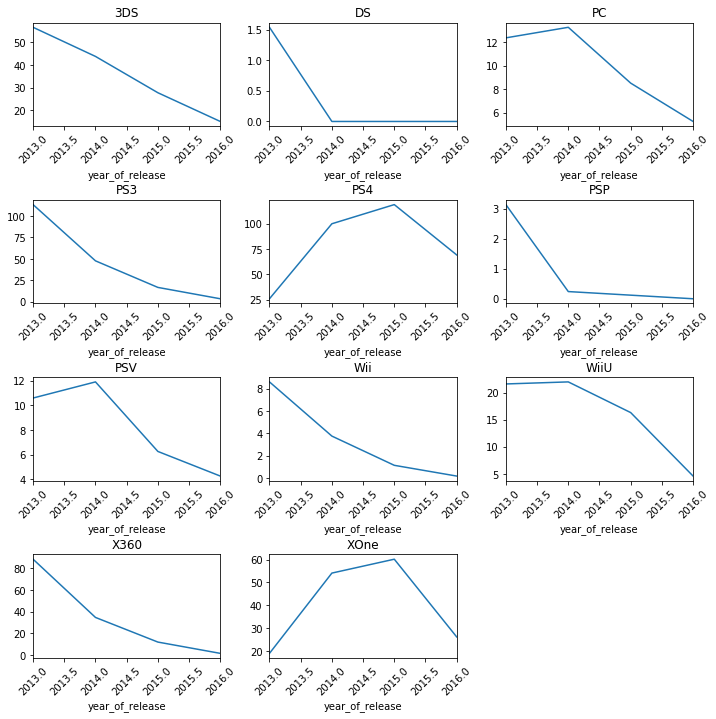

In [38]:
fig = plt.figure(1,figsize=(10,10))

for i,col in enumerate(game_new,1):
    fig.add_subplot(4,3,i,)
    game_new[col].plot(kind='line',ax=plt.gca())
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There is a general decline in performance by all platforms by 2016.

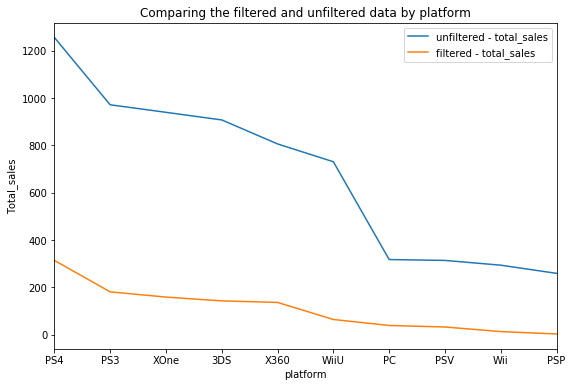

In [39]:
ax= games_df_platform.plot(figsize=(9,6))
(games_df_final_filter
 .pivot_table(index='platform',values='total_sales',aggfunc='sum')
 .sort_values('total_sales',ascending =False)).head(10).plot(ax=ax)
plt.title('Comparing the filtered and unfiltered data by platform')
plt.ylabel('Total_sales')
L=plt.legend()
L.get_texts()[0].set_text('unfiltered - total_sales')
L.get_texts()[1].set_text('filtered - total_sales');

In [40]:
(games_df_final_filter
 .pivot_table(index='platform',values='total_sales',aggfunc='sum')
 .sort_values('total_sales',ascending =False)).head(10)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


<div class="alert alert-block alert-success">
<b>Reviewer's comment.</b> <a class="tocSkip"></a>
    
Good comparison for filtered and unfiltered data!
</div>

### Conclusion
By the filtered data, PS2 and X360 are among the leading platforms with TG16 and 3DO completely out of the data set. There is a general decline in total sales across all platforms in the filtered data as against those in the unfiltered one.

## Boxblot by platform

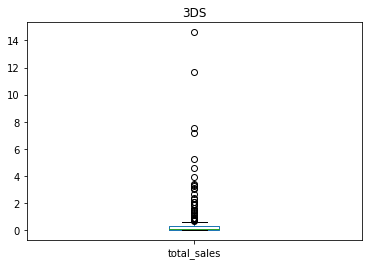

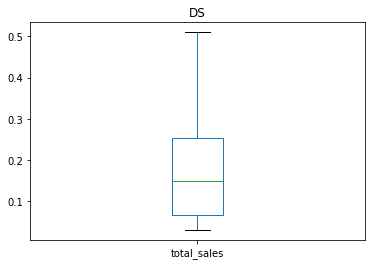

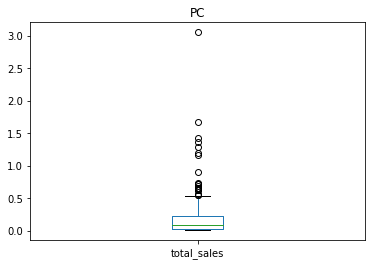

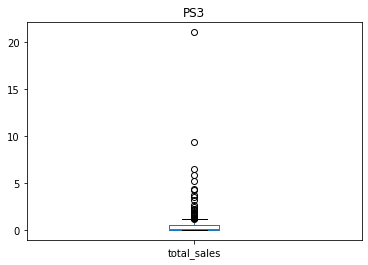

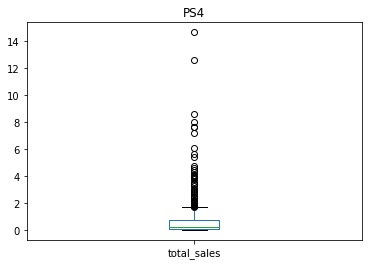

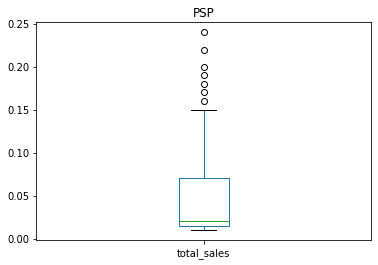

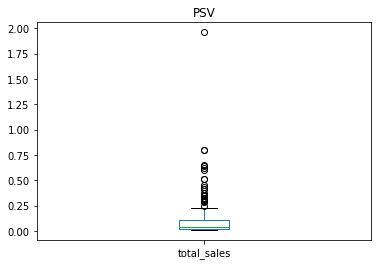

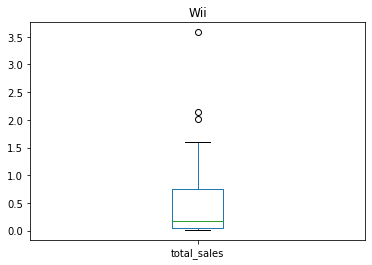

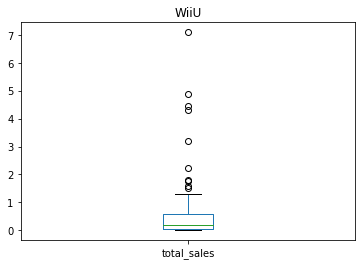

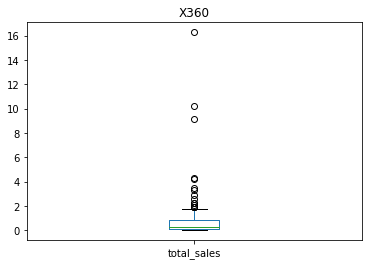

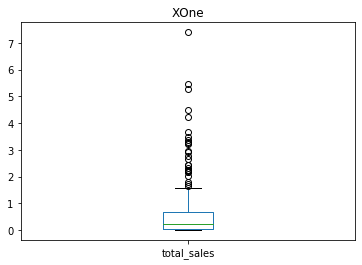

In [41]:
for platform, group_data in games_df_final_filter.groupby('platform'):
    group_data.plot(x='platform',y='total_sales',kind='box',title=platform);

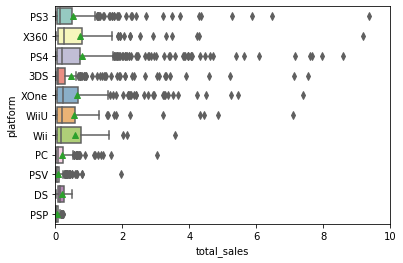

In [43]:
sns.boxplot(x='total_sales',
              y='platform',showmeans=True,palette="Set3",
              data=games_df_final_filter)
plt.rcParams["figure.figsize"] = (10,6)
plt.xlim([0,10]);

plt.show()

In [44]:
games_df_final_filter.groupby('platform')['total_sales'].mean().round(2)

platform
3DS     0.47
DS      0.19
PC      0.21
PS3     0.53
PS4     0.80
PSP     0.05
PSV     0.09
Wii     0.59
WiiU    0.56
X360    0.74
XOne    0.65
Name: total_sales, dtype: float64

### Conclusion
From the boxplot of the top 10 platforms, almost the platforms are right skewed with their means above their median values.

<div class="alert alert-block alert-success">
<b>Reviewer's comment. </b> <a class="tocSkip"></a>
    
Well done! Yes, most platforms have mean upper.
</div>

## User and profession reviews impact on sales

In [45]:
ps_4= games_df_final_filter.query('platform in "PS4"')
ps_4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NA,14.63
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,NA,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,adventure,0.00,0.00,0.01,0.00,69.0,7.5,NA,0.01
16503,Shin Hayarigami 2,PS4,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NA,0.01
16526,Dungeons 2,PS4,2016,role-playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


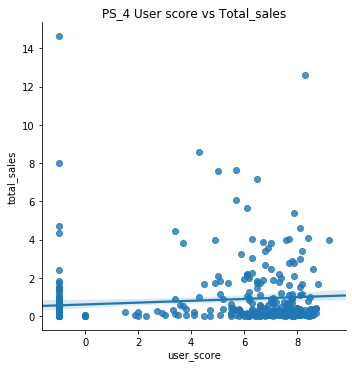

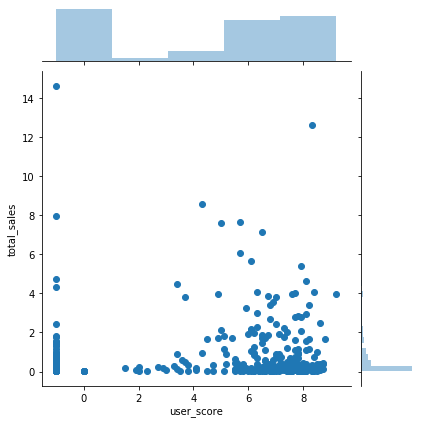

In [46]:
sns.lmplot(data=ps_4,x='user_score',y='total_sales')
plt.title('PS_4 User score vs Total_sales')
sns.jointplot(data=ps_4,x='user_score',y='total_sales');

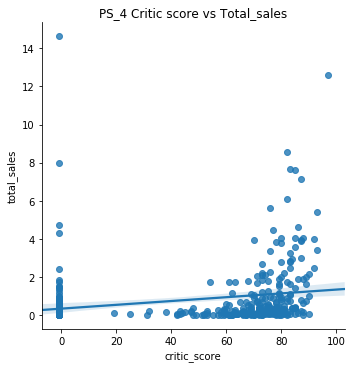

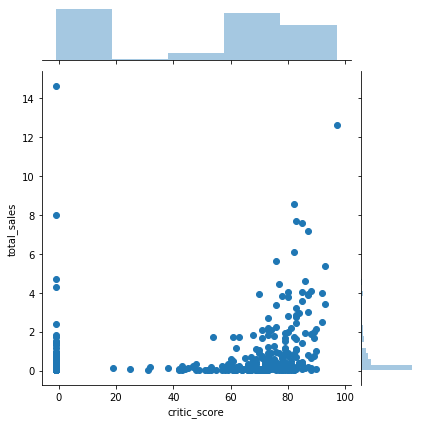

In [47]:
sns.lmplot(data=ps_4,x='critic_score',y='total_sales')
plt.title('PS_4 Critic score vs Total_sales')
sns.jointplot(data=ps_4,x='critic_score',y='total_sales');

In [48]:
ps_4[['user_score','critic_score','total_sales','rating']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.909195,0.114585
critic_score,0.909195,1.000000,0.226526
total_sales,0.114585,0.226526,1.000000


### Conclusion
There is a weak linear relationship between user_score, critic_score to PS4 games sold. Though this result is negatively afftected by the negative value imputed in replacing the null values.

There is a strong positive relationship between critic and user score. The most sales recorded by critic score was between zero and two with the most critic score being between 60 and 80.

<div class="alert alert-block alert-success">
<b>Reviewer's comment.</b> <a class="tocSkip"></a>
    
Great! Critics have positiverelationship here, but users no. Strange for SONY, but it is ok. 
</div>

## Compare sales of same game on other platforms

In [49]:
games_fill = games_df_final_filter[games_df_final_filter['name'].isin(ps_4.index)]
games_fill

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [50]:
other_filtered_games= games_df_final_filter.query('name in @ps_4')
other_filtered_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


### Conclusion
The games on PS4 platform are unique to their platform.

<div class="alert alert-block alert-success">
<b>Reviewer's comment. </b> <a class="tocSkip"></a>
    
OK
</div>

## Distribution of game by genre

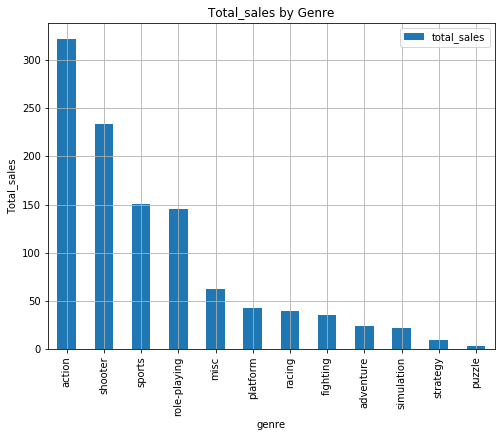

In [51]:
games_by_genre=(games_df_final_filter
                .pivot_table(index='genre',values='total_sales',aggfunc='sum',
                             fill_value=0)).sort_values('total_sales',ascending =False).plot(kind='bar',figsize=(8,6),grid=True)
plt.ylabel('Total_sales')
plt.title('Total_sales by Genre');

In [52]:
games_by_genre_stat= pd.DataFrame(games_df_final_filter.groupby(['genre','year_of_release'])['total_sales'].sum().reset_index())
games_by_genre_stat.sort_values('total_sales',ascending=False)
games_by_genre_stat.head()

,genre,year_of_release,total_sales
0,action,2013,122.51
1,action,2014,97.23
2,action,2015,72.02
3,action,2016,30.11
4,adventure,2013,6.09


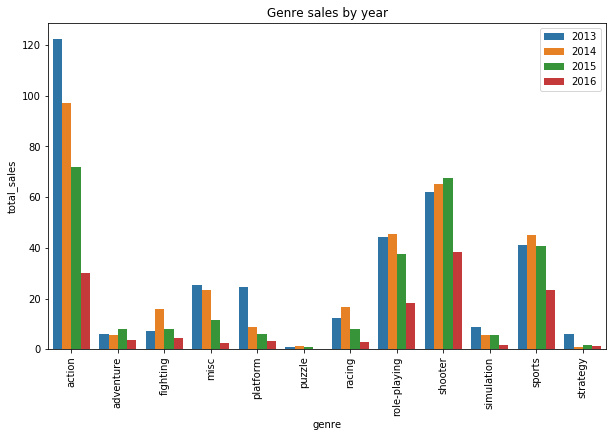

In [53]:
sns.barplot(x='genre', y='total_sales', hue='year_of_release', data=games_by_genre_stat, saturation=0.8)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('Genre sales by year')
plt.rcParams['figure.figsize'] = 9,9;

plt.show()

### Conclusion
2013 was the most profitable across all genres. Puzzle and strategy are the least performing genres for all years with action being the second profitable genre in 2016 after shooter.

<div class="alert alert-block alert-success">
<b>Reviewer's comment. </b> <a class="tocSkip"></a>
    
Our graphs looking better now!

Action and shooter are in top. It was expected. :) </div>

## Top platforms by region

#### NA Sales summary

In [54]:
na_sales_top_5 = games_df_final_filter.groupby('platform')['na_sales'].sum().reset_index()
na_sales_sorted = na_sales_top_5.sort_values('na_sales',ascending=False).head(5)
na_sales_sorted

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


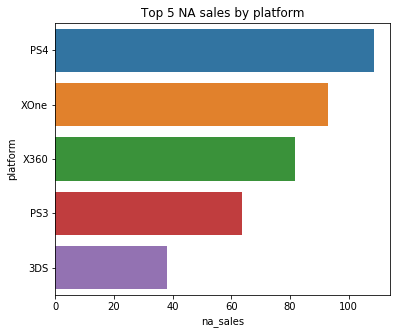

In [55]:
plt.rcParams['figure.figsize'] = [6, 5]
sns.set_color_codes("colorblind")
sns.barplot(x="na_sales", y="platform", data= na_sales_sorted, label="Sales")
sns.color_palette("hls", 5)
plt.title('Top 5 NA sales by platform')
plt.show()

In [56]:
explode_list = [0.09, 0, 0,0, 0.07]
def plot_top_sales_region(df, column, region, n=5):
    data = (df
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(n))
    data.plot(kind='pie', y=region,autopct='%1.0f%%', figsize=(10, 5),
              legend=True,explode = explode_list).set(label=data.index)
    plt.legend(bbox_to_anchor=(1.5,0.5), loc="upper right")
    plt.show()

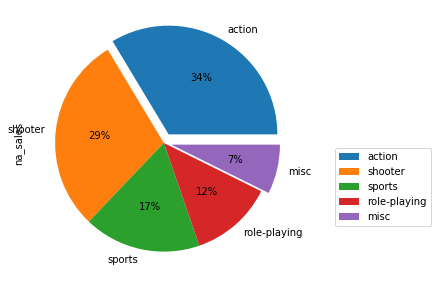

In [57]:
plot_top_sales_region(games_df_final_filter, 'genre', region = 'na_sales')

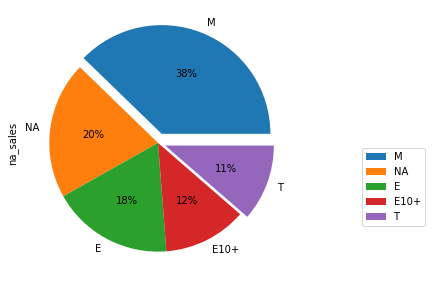

In [58]:
plot_top_sales_region(games_df_final_filter, 'rating', region = 'na_sales')

### Conclusion
PS4 followed by Xone were the most profitable platforms in na_region with action being the most bought genre. About 38% of games in the region  are rated M followed by 18% for E. NA which makes up 20% of results, represent yet to be rated games.

<div class="alert alert-block alert-success">
<b>Reviewer's comment. </b> <a class="tocSkip"></a>
    
Great! Now we have more infromation about NA popular platforms and genres.</div>

## EU Sales summary

In [59]:
eu_sales_top_5 = games_df_final_filter.groupby('platform')['eu_sales'].sum().reset_index()
eu_sales_sorted = eu_sales_top_5.sort_values('eu_sales',ascending=False).head(5)
eu_sales_sorted

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


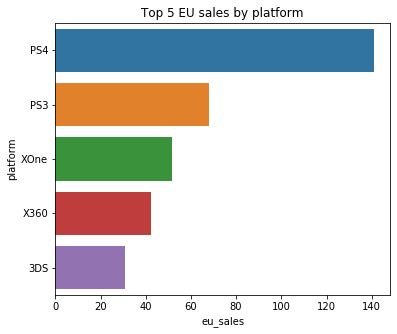

In [60]:
plt.rcParams['figure.figsize'] = [6, 5]
sns.set_color_codes("colorblind")
sns.barplot(x="eu_sales", y="platform", data= eu_sales_sorted, label="Sales")
sns.color_palette("hls", 5)
plt.title('Top 5 EU sales by platform')
plt.show()

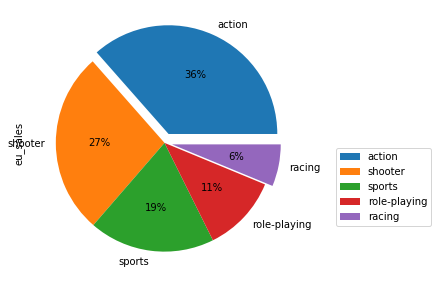

In [61]:
plot_top_sales_region(games_df_final_filter, 'genre', region = 'eu_sales')

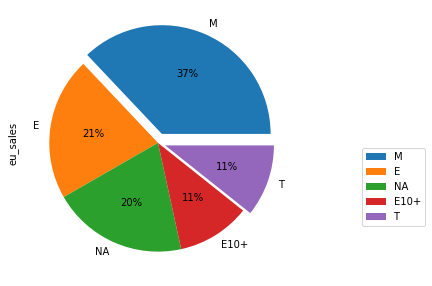

In [62]:
plot_top_sales_region(games_df_final_filter, 'rating', region = 'eu_sales')

### Conclusion
PS4 is the most profitable platform in eu_region followed by PS3. 36% of the games sold are action followed by 27% for shooter genres. 37% of the games in the region are M rated seconded by 21% for E ratings.

<div class="alert alert-block alert-success">
<b>Reviewer's comment.</b> <a class="tocSkip"></a>
    
Some resultsare the same with NA. SO, it is normal. :)
</div>

### JP sales summary

In [63]:
jp_sales_top_5 = games_df_final_filter.groupby('platform')['jp_sales'].sum().reset_index()
jp_sales_sorted = jp_sales_top_5.sort_values('jp_sales',ascending=False).head(5)
jp_sales_sorted

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


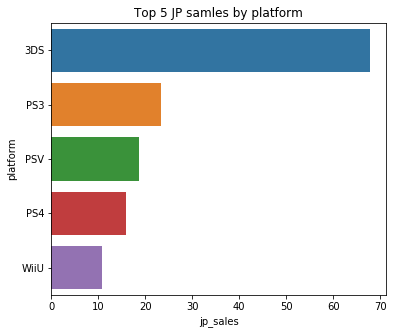

In [64]:
plt.rcParams['figure.figsize'] = [6, 5]
sns.set_color_codes("colorblind")
sns.barplot(x="jp_sales", y="platform", data= jp_sales_sorted, label="Sales")
sns.color_palette("hls", 5)
plt.title('Top 5 JP samles by platform')
plt.show()

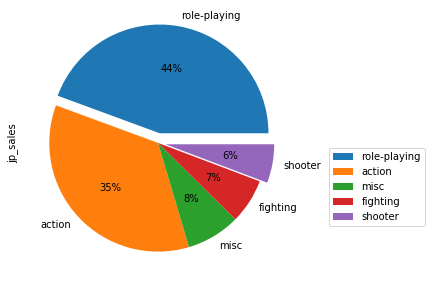

In [65]:
plot_top_sales_region(games_df_final_filter, 'genre', region = 'jp_sales')

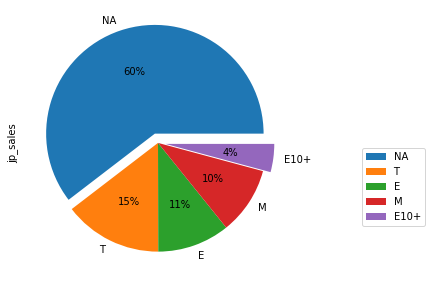

In [66]:
plot_top_sales_region(games_df_final_filter, 'rating', region = 'jp_sales')

### Conclusion

3DS is the most profitable in jp_region with PS4 being the forth. Role playing genre is 44% of total games sold followed by action. About 60% of the games in the region are not rated.

<div class="alert alert-block alert-success">
<b>Reviewer's comment. </b> <a class="tocSkip"></a>
    
Japan is other planet. It is normal too. :)</div>

In [67]:
share_by_market = (games_df_final_filter
                   .pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
                   .sort_values(['na_sales','eu_sales','jp_sales'],ascending=False).head(6))
share_by_market

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
PS3,67.81,23.35,63.50
3DS,30.96,67.81,38.20
WiiU,19.85,10.88,29.21


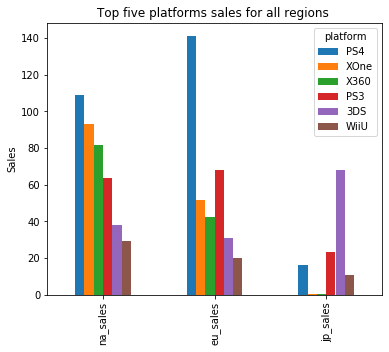

In [68]:
share_by_market2= (games_df_final_filter.groupby('platform')['na_sales','eu_sales','jp_sales']
                   .sum().sort_values(['na_sales','eu_sales','jp_sales'],ascending=False).head(6))
share_by_market2.transpose().plot(kind='bar')
plt.ylabel('Sales')
plt.title('Top five platforms sales for all regions ');

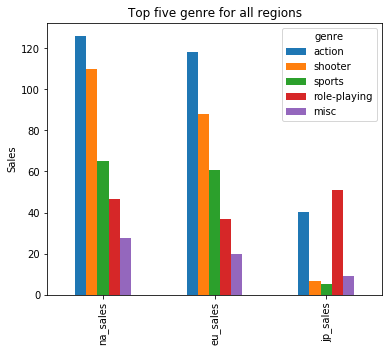

In [69]:
share_by_genre = (games_df_final_filter.groupby('genre')['na_sales','eu_sales','jp_sales']
                   .sum().sort_values(['na_sales','eu_sales','jp_sales'],ascending=False).head(5))
share_by_genre.transpose().plot(kind='bar')
plt.ylabel('Sales')
plt.title('Top five genre for all regions');

In [70]:
stat = pd.DataFrame(games_df_final_filter
                    .groupby('platform')[['na_sales','eu_sales','jp_sales']].head().agg(['mean','var','std']).round(2))
stat

,na_sales,eu_sales,jp_sales
mean,2.05,1.81,0.45
var,4.65,3.73,0.75
std,2.16,1.93,0.87


## Conclusion

Overall, PS4 is the most profitable platform with most sales coming from the eu_region followed by na_region. 3DS being the most profitable in jp_region has minimal preformance in the other regions.
Despite role playing being the most profitable in jp_region, it's performance is lower relative to those in na and eu regions.


<div class="alert alert-block alert-success">
<b>Reviewer's comment. </b> <a class="tocSkip"></a>
    
Thank you for such summary! You are absolutely right!

</div>

## Hypothesis testing

In [71]:
games_df_final_filter['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [72]:
xbox_one = games_df_final_filter.query('platform =="XOne"')
xbox_one.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,NA,7.39
165,Grand Theft Auto V,XOne,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,role-playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


In [73]:
pc = games_df_final_filter.query('platform == "PC"')
pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1095,StarCraft II: Heart of the Swarm,PC,2013,strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
1351,SimCity (2013),PC,2013,simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42
1437,Battlefield 4,PC,2013,shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36
1530,Fallout 4,PC,2015,role-playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28


In [74]:
xbox = games_df_final_filter[games_df_final_filter['platform'].isin(['XOne'])].dropna()['user_score'].values

In [75]:
pc_1 = games_df_final_filter[games_df_final_filter['platform']=='PC'].dropna()['user_score'].values

**Null hypothesis:** That the means from Xbox one and PC platforms are the same.

**Alternative Hypothesis:** That the means from Xbox one and PC are not the same.

In [76]:
alpha=0.05
results = st.ttest_ind(xbox,pc_1,equal_var=True)
print('pvalue:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis: Average profit for Xone and PC are different.")
else:
    print("We can't reject the null hypothesis: Average profit for Xone and PC are the same.")
print('The mean values are:')
print(f' Xone mean={xbox.mean()}')
print(f' PC mean = {pc_1.mean()}')    

pvalue: 0.21340496593770697
We can't reject the null hypothesis: Average profit for Xone and PC are the same.
The mean values are:
 Xone mean=4.586639676113361
 PC mean = 4.988359788359788


### Conclusion
The results suggest that, there isn't enough evidence to reject the null hypothesis.

**Null Hypothesis:** The average user ratings for Action and Sports genre are the same.

**Altenative Hypothesis:** The average user ratings for Action and Sports genre are different.

In [77]:
genre_action = games_df_final_filter[games_df_final_filter['genre']=='action'].dropna()['user_score'].values

In [78]:
genre_sports = games_df_final_filter[games_df_final_filter['genre']=='sports'].dropna()['user_score'].values

In [79]:
alpha=0.05
results = st.ttest_ind(genre_action,genre_sports,equal_var=False)
print('pvalue:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis: Average profit for Action and Sports genre are different")
else:
    print("We can't reject the null hypothesis: Average profit for Action and sports genre are the same.")
print('The mean values are:')
print(f' Action genre mean={genre_action.mean()}')
print(f' Sports genre mean = {genre_sports.mean()}') 

pvalue: 0.006714395035840122
We reject the null hypothesis: Average profit for Action and Sports genre are different
The mean values are:
 Action genre mean=3.036292428198433
 Sports genre mean = 3.7247663551401864


### Conclusion
Average profit from action and sport genres are different

<div class="alert alert-block alert-success">
<b>Reviewer's comment. </b> <a class="tocSkip"></a>
    
So, we have interesting results here! Yes, profit it depends on genres, because they are different.
    
Average profit for Xone and PC are the same - is a surprise 
    
</div>

## Final Conclusion

**Data Analysis:**
The data had some significant missing values for critic_score, user_score and ratings. These were filled using diffeent  approaches. To be determine(TBD) entires in ratings were replaced with zero as these ratings are not missing but yet to be determined.

**Exploratory Analysis**
It provided insight on extreme outliers for year_of_release which was filtered out at this stage. The results also shows that, except for critic score. most of the datas are right skewed.

**Findings**
1. PS4, PS3, Xone are among the most popular platforms between 2013 and 2016.
2. 2600 first appeared in 1982 and faded out by 1987. PS4 first appeared in 2015 and therefore still new whiles X360 first appeared in 2010.
3. The results from the platforms are right skewed with their means at about their 75th percentile region. 
4. There a weak linear relationship between user_score, critic_score and sales.
5. Action, sports, shooter, role_playing and misc are the top 5 genre by sales across regions  with role_playing being the most popular genre in jp_region.
6. There is not enough evidence to suggest average sales for Xone and PC are different.
7. The average profit from action and sports genres are different.

***
Decision on where and what platform,genre to advertise would largely have to be based on the region as there is strong evidence to support it. Sceondly, The time span for platform performance seems short and so its' important to factor this in deciding which platforms to advertise on and time duration. 
Lastly, expert reviews on games should not be overlooked despite having a weak linear relationship on sales. 



</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.</b> <a class="tocSkip"></a>
    
Thank you for adding actual information!
    
</div>